In [1]:
# supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# #importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


In [3]:
# reading the dataset
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# inspecting the dataset
print(train.shape)
print(train.columns)
print(train.info())
print(train.describe())

(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

In [5]:
# checking for duplicate values
sum(train.duplicated(subset = "Id")) == 0

True

In [6]:
# finding the sum of Null values in each column and also if there is any Null values in the dataframe

print (train.isnull().sum().sort_values(ascending = False))  
print (train.isnull().values.sum())

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [7]:
# percentage summing up the missing values (column wise)
round(100*(train.isnull().sum()/len(train.index)), 2).sort_values(ascending = False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
                 ...  
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
3SsnPorch         0.00
BsmtUnfSF         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
Functional 

In [8]:
#imputing the Null values with median, No Garage, No Basement, No Pool, None, No alley access, 
#No Fence, No Fireplace as per the Data Dictionary
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].median())
train['GarageType']=train['GarageType'].fillna('No Garage')
train['GarageFinish']=train['GarageFinish'].fillna('No Garage')
train['GarageCond']=train['GarageCond'].fillna('No Garage')
train['GarageQual']=train['GarageQual'].fillna('No Garage')   
train['BsmtExposure']=train['BsmtExposure'].fillna('No Basement')
train['BsmtFinType2']=train['BsmtFinType2'].fillna('No Basement')
train['BsmtFinType1']=train['BsmtFinType1'].fillna('No Basement')
train['BsmtCond']=train['BsmtCond'].fillna('No Basement')
train['BsmtQual']=train['BsmtQual'].fillna('No Basement')
train['PoolQC']=train['PoolQC'].fillna('No Pool')
train['MiscFeature']=train['MiscFeature'].fillna('None')
train['Alley']=train['Alley'].fillna('No alley access')
train['Fence']=train['Fence'].fillna('No Fence')
train['FireplaceQu']=train['FireplaceQu'].fillna('No Fireplace')
train['MasVnrType']=train['MasVnrType'].fillna('None')

In [9]:
# percentage summing up the missing values (column wise)
round(100*(train.isnull().sum()/len(train.index)), 2).sort_values(ascending = False)

GarageYrBlt      5.55
MasVnrArea       0.55
Electrical       0.07
SalePrice        0.00
ExterCond        0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.00
ExterQual        0.00
Foundation       0.00
BsmtQual         0.00
BsmtCond         0.00
BsmtExposure     0.00
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinType2     0.00
BsmtFinSF2       0.00
YearRemodAdd     0.00
YearBuilt        0.00
TotalBsmtSF      0.00
OverallCond      0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
Alley            0.00
LotShape         0.00
                 ... 
PoolArea         0.00
GarageCars       0.00
PoolQC           0.00
Fence            0.00
MiscFeature      0.00
MiscVal          0.00
MoSold           0.00
YrSold           0.00
SaleType         0.00
GarageArea       0.00
GarageFinish     0.00
SaleCondition    0.00
FullBath         0.00
CentralAir       0.00
1stFlrSF  

In [10]:
# dropping 'GarageYrBlt' column as it have got more then 5% Null values and imputing Null with mean or anyother value 
# will mislead the data. 
train = train.drop(['GarageYrBlt'],axis=1)

In [11]:
# dropping Null values (row wise)
train = train[~np.isnan(train['MasVnrArea'])]
train = train[train['Electrical'].notnull()]

In [12]:
train.shape

(1451, 80)

In [13]:
#To know the unique values in each column that remains of the dataframe
for col in train: 
    print (col,': ',train[col].dtype,train[col].unique()) 

Id :  int64 [   1    2    3 ... 1458 1459 1460]
MSSubClass :  int64 [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning :  object ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage :  float64 [ 65.  80.  68.  60.  84.  85.  75.  69.  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  21.  32.  78. 121. 122.  40. 105.
  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92. 134.
  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.  93.
  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.  36.
  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39. 144.
 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
LotArea :  int64 [ 8450  9600 11250 ... 17217 13175  9717]
Street :  object ['Pave' 'Grvl']
Alley :  object ['No alley access' 'Grvl' 'Pave']
LotShape :  object ['Reg' 'IR1' 'IR2' 'IR3']
LandContour :  object ['Lvl' 'Bnk' 'Low' 'HLS']
Ut

WoodDeckSF :  int64 [  0 298 192  40 255 235  90 147 140 160  48 240 171 100 406 222 288  49
 203 113 392 145 196 168 112 106 857 115 120  12 576 301 144 300  74 127
 232 158 352 182 180 166 224  80 367  53 188 105  24  98 276 200 409 239
 400 476 178 574 237 210 441 116 280 104  87 132 238 149 355  60 139 108
 351 209 216 248 143 365 370  58 197 263 123 138 333 250 292  95 262  81
 289 124 172 110 208 468 256 302 190 340 233 184 201 142 122 155 670 135
 495 536 306  64 364 353  66 159 146 296 125  44 215 264  88  89  96 414
 519 206 141 260 324 156 220  38 261 126  85 466 270  78 169 320 268  72
 349  42  35 326 382 161 179 103 253 148 335 176 390 328 312 185 269 195
  57 236 517 304 198 426  28 316 322 307 257 219 416 344 380  68 114 327
 165 187 181  92 228 245 503 315 241 303 133 403  36  52 265 207 150 290
 486 278  70 418 234  26 342  97 272 121 243 511 154 164 173 384 202  56
 321  86 194 421 305 117 550 509 153 394 371  63 252 136 186 170 474 214
 199 728 436  55 431 448 361 36

In [14]:
# Feature variable for the HouseAge from 'YrSold' and 'YearBuilt'
train['HouseAge'] = train['YrSold'] - train['YearBuilt']

In [15]:
# dropping 'YrSold' & 'YearBuilt' after creating a derive matric 
train = train.drop(['YrSold', 'YearBuilt'],axis=1)

In [16]:
# A function to map the categorical levels to actual numbers.
def num_map(x):
    return x.map({'Y': 2, "P": 1, "N": 0,})

# Applying the function to the two columns
train[['CentralAir', 'PavedDrive']] = train[['CentralAir', 'PavedDrive']].apply(num_map)

In [17]:
# checking for missing values
print (train.isnull().values.sum())

0


In [18]:
# inspecting the Datatype
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 79 columns):
Id               1451 non-null int64
MSSubClass       1451 non-null int64
MSZoning         1451 non-null object
LotFrontage      1451 non-null float64
LotArea          1451 non-null int64
Street           1451 non-null object
Alley            1451 non-null object
LotShape         1451 non-null object
LandContour      1451 non-null object
Utilities        1451 non-null object
LotConfig        1451 non-null object
LandSlope        1451 non-null object
Neighborhood     1451 non-null object
Condition1       1451 non-null object
Condition2       1451 non-null object
BldgType         1451 non-null object
HouseStyle       1451 non-null object
OverallQual      1451 non-null int64
OverallCond      1451 non-null int64
YearRemodAdd     1451 non-null int64
RoofStyle        1451 non-null object
RoofMatl         1451 non-null object
Exterior1st      1451 non-null object
Exterior2nd      1451 no

In [19]:
# checking for outliers 
print(train.SalePrice.describe(percentiles=[.25,.5,.75,.90,.95,.99]))
print(train.MasVnrArea.describe(percentiles=[.25,.5,.75,.90,.95,.99]))

count      1451.000000
mean     180624.101999
std       79312.128273
min       34900.000000
25%      129900.000000
50%      162500.000000
75%      214000.000000
90%      278000.000000
95%      325812.000000
99%      439390.000000
max      755000.000000
Name: SalePrice, dtype: float64
count    1451.00000
mean      103.75672
std       181.10815
min         0.00000
25%         0.00000
50%         0.00000
75%       166.00000
90%       335.00000
95%       456.00000
99%       792.00000
max      1600.00000
Name: MasVnrArea, dtype: float64


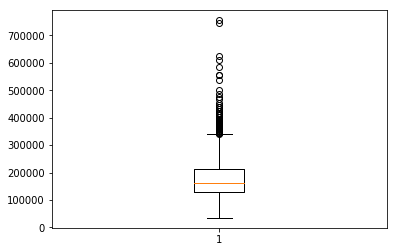

In [20]:
#Let's do the outlier analysis before proceeding
plt.boxplot(train.SalePrice)
Q1 = train.SalePrice.quantile(0.05)
Q3 = train.SalePrice.quantile(0.95)
IQR = Q3 - Q1
train = train[(train.SalePrice >= Q1) & (train.SalePrice <= Q3)]

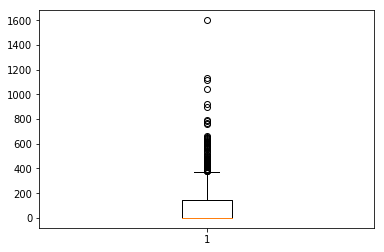

In [21]:
#Let's do the outlier analysis before proceeding
plt.boxplot(train.MasVnrArea)
Q1 = train.SalePrice.quantile(0.05)
Q3 = train.SalePrice.quantile(0.95)
IQR = Q3 - Q1
train = train[(train.SalePrice >= Q1) & (train.SalePrice <= Q3)]


In [22]:
# Around 85% of the data are retained after outlier treatment
train.shape

(1177, 79)

In [23]:
# taking all the numeric Datatype (float, int)
train_numeric = train.select_dtypes(include=['float64', 'int64'])
train_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge
0,1,60,65.0,8450,7,5,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,208500,5
1,2,20,80.0,9600,6,8,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,181500,31
2,3,60,68.0,11250,7,5,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,223500,7
3,4,70,60.0,9550,7,5,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,140000,91
4,5,60,84.0,14260,8,5,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,250000,8


In [24]:
# dropping Id
train_numeric = train_numeric.drop(['Id'], axis=1)
train_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge
0,60,65.0,8450,7,5,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,208500,5
1,20,80.0,9600,6,8,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,181500,31
2,60,68.0,11250,7,5,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,223500,7
3,70,60.0,9550,7,5,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,140000,91
4,60,84.0,14260,8,5,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,250000,8


In [25]:
# taking all the categorical Datatype
train_categorical = train.select_dtypes(include=['object'])
train_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,No Fireplace,Attchd,RFn,TA,TA,No Pool,No Fence,None,WD,Normal
1,RL,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Attchd,RFn,TA,TA,No Pool,No Fence,None,WD,Normal
2,RL,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,Attchd,RFn,TA,TA,No Pool,No Fence,None,WD,Normal
3,RL,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Detchd,Unf,TA,TA,No Pool,No Fence,None,WD,Abnorml
4,RL,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,TA,Attchd,RFn,TA,TA,No Pool,No Fence,None,WD,Normal


In [26]:
# Convert into dummies
train_dummies = pd.get_dummies(train_categorical, drop_first=True)
train_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [27]:
# Drop categorical variable columns
train = train.drop(list(train_categorical.columns), axis=1)

In [28]:
# Concatenate the two DataFrame to train
train = pd.concat([train_numeric, train_dummies], axis=1)

In [29]:
# Split the train dataset into X and y

y = train.pop('SalePrice')
X = train

In [30]:
# scaling the features
from sklearn.preprocessing import scale


cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=246)

In [31]:
# split into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
# list of alphas(hyperparameter) to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#Ridge Regression
ridge = Ridge()

# cross validation
folds = 10 #taking 10 folds
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:   10.1s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [33]:
# storing the results after crossvalidation of Redge Regression
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.031801,0.002892,0.001200,0.000399,0.0001,{'alpha': 0.0001},-19726.310534,-13663.510207,-13713.608160,-17581.904027,...,-8311.982854,-8274.092204,-8542.685560,-7986.742492,-8214.936148,-8355.102739,-8328.298821,-8194.752576,-8288.576902,135.379424
1,0.030501,0.001433,0.001301,0.000457,0.001,{'alpha': 0.001},-19725.594514,-13663.462763,-13710.905711,-17580.919748,...,-8312.190227,-8274.361733,-8542.831451,-7987.133023,-8215.099550,-8355.113604,-8328.445861,-8194.834523,-8288.741149,135.321127
2,0.031301,0.002532,0.001201,0.000400,0.01,{'alpha': 0.01},-19718.695097,-13662.863056,-13684.952249,-17571.436902,...,-8314.215622,-8276.946621,-8544.190309,-7990.754653,-8216.720345,-8355.266666,-8329.853423,-8195.648798,-8290.415722,134.798462
3,0.030502,0.001628,0.001201,0.000400,0.05,{'alpha': 0.05},-19692.420550,-13658.311097,-13587.792015,-17535.341424,...,-8324.121688,-8288.442466,-8548.860901,-8003.175217,-8223.707453,-8360.560190,-8335.207104,-8199.540388,-8297.788470,133.217047
4,0.030601,0.002417,0.001301,0.000459,0.1,{'alpha': 0.1},-19665.921343,-13650.617894,-13494.197866,-17498.919066,...,-8335.401011,-8299.560289,-8553.334807,-8015.823568,-8230.890155,-8370.220745,-8341.397470,-8204.363197,-8305.913276,131.746348


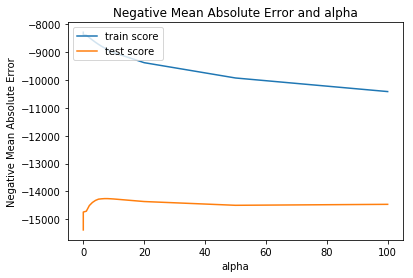

In [34]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [35]:
# taking alpha as 12 since the test graph is at pick in that particular point with neg-mean absolute error highest
alpha = 12
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-3.09965814e+03, -9.58566294e+02,  5.44914168e+03,  7.95206955e+03,
        4.80655873e+03,  1.17395239e+03,  4.78530534e+02,  1.41329297e+03,
        9.05142460e+02, -6.04696944e+01,  1.90260308e+03, -2.31918778e+02,
        4.54290644e+03,  7.07989136e+03,  1.09810243e+02,  1.01170240e+04,
        2.21007326e+03, -1.86178931e+01,  2.39946852e+03, -1.75535517e+02,
       -1.29915580e+02, -1.42269880e+03,  2.25396311e+03, -3.37957054e+02,
        3.14646492e+03,  1.76124821e+03,  2.49295404e+02,  2.10789842e+03,
        1.68726116e+03,  1.26351211e+03,  5.25249958e+01,  2.33802198e+03,
        9.82378970e+03,  2.90187660e+02,  9.75264270e+02, -7.15687935e+03,
        1.71946058e+03,  8.48913271e+02,  4.05020819e+03, -1.07998237e+03,
        8.07589029e+02, -6.53674646e+02, -1.62978490e+03,  9.00310188e+02,
       -6.84387852e+02,  5.96979631e+02,  1.03933227e+03,  1.63735586e+02,
        1.50878389e+03, -1.20415810e+03,  1.67079873e+03, -1.16734466e+03,
       -1.40786815e+02, -

In [36]:
# Lasso Regression
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [37]:
# storing the data of Lasso Regression
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.835831,0.029756,0.001999,0.000447,0.0001,{'alpha': 0.0001},-19622.519640,-13640.839478,-13439.239110,-17663.808243,...,-8346.183342,-8313.552654,-8550.994339,-8020.914644,-8236.958881,-8377.260759,-8346.740303,-8198.978284,-8312.726602,132.583164
1,0.847401,0.041559,0.002000,0.000445,0.001,{'alpha': 0.001},-19622.799468,-13640.813668,-13439.162567,-17663.779708,...,-8346.186648,-8313.555470,-8550.996269,-8020.918720,-8236.960722,-8377.264538,-8346.740701,-8198.983929,-8312.729263,132.582348
2,0.855631,0.052704,0.002100,0.000301,0.01,{'alpha': 0.01},-19625.641595,-13640.555595,-13438.397097,-17663.494335,...,-8346.221051,-8313.586803,-8551.017996,-8020.960401,-8236.981143,-8377.307432,-8346.746237,-8199.042411,-8312.757867,132.574496
3,0.822446,0.025905,0.001783,0.000393,0.05,{'alpha': 0.05},-19638.310969,-13639.455736,-13434.971222,-17662.191829,...,-8346.381094,-8313.745290,-8551.116743,-8021.150829,-8237.131542,-8377.505707,-8346.773388,-8199.311827,-8312.901841,132.538387
4,0.814828,0.034998,0.002001,0.000632,0.1,{'alpha': 0.1},-19651.038425,-13638.068718,-13430.738252,-17660.384191,...,-8346.562946,-8314.005475,-8551.246248,-8021.408794,-8237.354407,-8377.766362,-8346.806362,-8199.676908,-8313.101225,132.488983


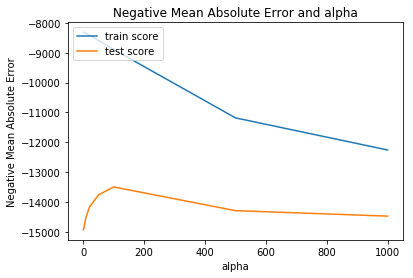

In [38]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [39]:
# taking alpha as 100 since the test graph is at pick in that particular point with neg-mean absolute error highest
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [40]:
# Lasso coeffient
lasso.coef_

array([-3.82040734e+03,  0.00000000e+00,  5.63996445e+03,  8.09787382e+03,
        5.06610858e+03,  9.07438000e+02,  2.61215565e+02,  3.17723109e+03,
        1.27794650e+03, -0.00000000e+00,  3.34123197e+03, -8.73012778e+01,
        0.00000000e+00,  0.00000000e+00, -7.93732204e+02,  1.80549807e+04,
        1.82118739e+03, -1.72680941e+02,  1.54507427e+03, -0.00000000e+00,
       -2.71126716e+02, -1.48610980e+03,  1.38956805e+03,  0.00000000e+00,
        2.44882812e+03,  2.28042281e+03,  0.00000000e+00,  2.14661938e+03,
        1.99812376e+03,  1.17767232e+03, -0.00000000e+00,  2.11544557e+03,
        1.80135057e+02,  3.61275513e+01,  6.55699116e+02, -8.38262922e+03,
        0.00000000e+00,  7.71321867e+01,  1.43580523e+03, -2.10076432e+03,
        6.59358060e+02, -1.38798634e+02, -9.89961508e+02,  4.56960908e+02,
       -6.02121911e+01,  1.93560248e+01,  5.13726815e+02, -2.86461391e+02,
        5.77274631e+02, -9.78623531e+02,  1.45422625e+03, -8.68208974e+02,
       -0.00000000e+00,  

In [41]:
# storing the coefficient and indexing it with the original attributes
coefficient = pd.Series(lasso.coef_, index = X.columns)

In [42]:
# checking the number of features Lasso have selected
print("Lasso have selected " + str(sum(coefficient != 0)) + " variables and removing the other " +  str(sum(coefficient == 0)) + " variables")

Lasso have selected 180 variables and removing the other 66 variables


In [43]:
# inspecting the coefficient selected by Lasso taking from Top 5 and Bottom 5
inspt_coefficient = pd.concat([coefficient.sort_values().head(5),
                     coefficient.sort_values().tail(5)])

Text(0.5,1,'Inspection of Coefficient')

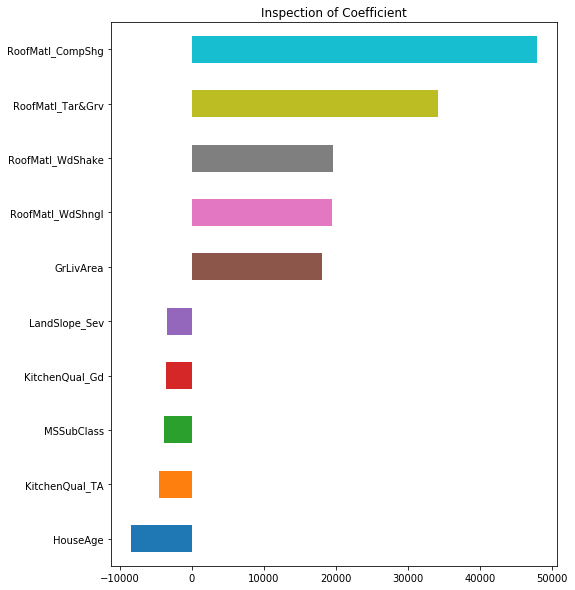

In [44]:
# ploting the important variables
plt.rcParams['figure.figsize'] = (8.0, 10.0)
inspt_coefficient.plot(kind = "barh")
plt.title("Inspection of Coefficient")

In [45]:
# Top 10 important variables from Lasso regression
Top = pd.DataFrame(coefficient.sort_values(ascending = False))
Top.head(10)

,0
RoofMatl_CompShg,47907.448653
RoofMatl_Tar&Grv,34207.215251
RoofMatl_WdShake,19561.236085
RoofMatl_WdShngl,19452.749714
GrLivArea,18054.980720
RoofMatl_Metal,11978.004380
RoofMatl_Roll,10649.523422
OverallQual,8097.873816
LotArea,5639.964455
OverallCond,5066.108585
